## Calculate the optimal number of cluster for YOLO

### Submitted by Deepak Hazarika  , Parinita Bora , Gurudatta


### Import the required libraries




In [24]:
import time;

localtime = time.asctime(time.localtime(time.time()))
print ("Local current time :", localtime)

Local current time : Sat Oct 17 23:03:28 2020


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

C:\Users\dhazarik.ORADEV\Anaconda3\envs\newptch\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import csv
import re
from PIL import Image
import numpy as np
import math 

## Initialize the constatnts
Number of grid cells = 13 x 13

In [3]:
GRID_X = 13.0
GRID_Y = 13.0

### Find the image file size for use during annotation
Store the image file size in a dictionary for later use


In [4]:
import glob, os

img_path = 'C:\\eva\\eva5\\week12\\renamedimages\\'

yolo_Dict = {}

for root, dirs, files in os.walk(img_path):
    print(root)
    for file in files:
        if file.endswith(".jpg"):
            file_path = os.path.join(root,file)
            img = Image.open(file_path , mode= 'r')
            #print(" path {} shape {}".format(file_path , img.size))
            imgDict = {}
            imgDict = {'Img_X': img.size[0] , 'Img_Y': img.size[1]} 
            yolo_Dict[file] = imgDict



C:\eva\eva5\week12\renamedimages\


## Load the annotated json file

In [5]:
import json 

filepath = 'C:\\eva\\eva5\\week12\\'

# Opening JSON file 
f = open(filepath + 'S12_assignment.json',) 
  
# returns JSON object as  
# a dictionary 
data = json.load(f) 
  


## Parse the json object and extract the following

The image file name , bounding box width and height and the class and store in a dataframe

[
{'shape_attributes': {'name': 'rect', 'x': 33, 'y': 131, 'width': 43, 'height': 62}, 
'region_attributes': {'': 'boot1', 'dropdown': 'boot'}
}, 

In [6]:
# Iterating through the json 
# list 
json_img_name = []
json_box_width = []
json_box_height = []
json_box_class = []

for i in data['_via_img_metadata']: 
    itok = i.split('.')
    itok[1] = itok[1][:3]
    itok = '.'.join(itok)
    print(itok)
    #print(data['_via_img_metadata'][i]['regions'])
    for j in range(len(data['_via_img_metadata'][i]['regions'])):
        #print(" region {} ".format( data['_via_img_metadata'][i]['regions'][j]))
        region = data['_via_img_metadata'][i]['regions'][j]
        shape_attrib_width = region['shape_attributes']['width']
        shape_attrib_height = region['shape_attributes']['height']
        region_attrib_class = region['region_attributes']['dropdown']
        #print("name {} class {} box_w {} box_h {}".format(itok, region_attrib_class ,shape_attrib_width ,shape_attrib_height))
        
        json_img_name.append(itok)
        json_box_width.append(shape_attrib_width)
        json_box_height.append(shape_attrib_height)
        json_box_class.append(region_attrib_class)
          
assert (len(json_img_name) == len(json_box_width) == len(json_box_height) == len(json_box_class))
jsonImgDict = {'Img_name': json_img_name, 'Box_width': json_box_width , 'Box_height': json_box_height, 'Box_class': json_box_class}            
jsonDF = pd.DataFrame(data = jsonImgDict)
            
# Closing file 
f.close() 

img_1.jpg
img_2.jpg
img_3.jpg
img_4.jpg
img_5.jpg
img_6.jpg
img_7.jpg
img_8.jpg
img_9.jpg
img_10.jpg
img_11.jpg
img_12.jpg
img_13.jpg
img_14.jpg
img_15.jpg
img_16.jpg
img_17.jpg
img_18.jpg
img_19.jpg
img_20.jpg
img_21.jpg
img_22.jpg
img_23.jpg
img_24.jpg
img_25.jpg
img_26.jpg
img_27.jpg
img_28.jpg
img_29.jpg
img_30.jpg
img_31.jpg
img_32.jpg
img_33.jpg
img_34.jpg
img_35.jpg
img_36.jpg
img_37.jpg
img_38.jpg
img_39.jpg
img_40.jpg
img_41.jpg
img_42.jpg
img_43.jpg
img_44.jpg
img_45.jpg
img_46.jpg
img_47.jpg
img_48.jpg
img_49.jpg
img_51.jpg
img_52.jpg
img_53.jpg
img_54.jpg
img_55.jpg
img_56.jpg
img_57.jpg
img_58.jpg
img_59.jpg
img_60.jpg
img_61.jpg
img_63.jpg
img_64.jpg
img_65.jpg
img_66.jpg
img_67.jpg
img_68.jpg
img_69.jpg
img_70.jpg
img_71.jpg
img_72.jpg
img_73.jpg
img_74.jpg
img_75.jpg
img_76.jpg
img_77.jpg
img_78.jpg
img_79.jpg
img_80.jpg
img_81.jpg
img_82.jpg
img_83.jpg
img_84.jpg
img_85.jpg
img_86.jpg
img_87.jpg
img_88.jpg
img_89.jpg
img_90.jpg
img_91.jpg
img_92.jpg
img_93.jpg
img_94.j

### set the image file size for each bounding box

in the dataframe

In [7]:
img_width = []
img_height = []
for i, row in jsonDF.iterrows():
    #print( "img {} dim {}".format(row['Img_name'] , yolo_Dict[row['Img_name']]))
    img_width.append(yolo_Dict[row['Img_name']]['Img_X'])
    img_height.append(yolo_Dict[row['Img_name']]['Img_Y'])
    
assert (len(img_width) == len(img_height) == len(jsonDF))


jsonDF["Image_width"] = img_width
jsonDF["Image_height"] = img_height

### Normalize the bounding box width and height w.r.t image width and height 
This will help in comparing the bounding box for images of different size

In [8]:
jsonDF["Box_norm_width"]  = jsonDF['Box_width']/ jsonDF['Image_width']
jsonDF["Box_norm_height"]  = jsonDF['Box_height']/ jsonDF['Image_height']


In [9]:
jsonDF["Box_X"] =((jsonDF['Box_width']/ jsonDF['Image_width'])*GRID_X)
jsonDF["Box_Y"] = ((jsonDF['Box_height']/ jsonDF['Image_height'])*GRID_Y)


### Translate the centroid of the bounding box to a cell location in a 13 x 13 grid

In [10]:
jsonDF["Box_X"] = [math.ceil(x) for x in jsonDF["Box_X"]]
jsonDF["Box_Y"] = [math.ceil(x) for x in jsonDF["Box_Y"]]

### Extract the normalized location of bounding box from the dataframe
This is fed to the K Means calculator

In [11]:
feedTOKMeans = np.asarray([[jsonDF['Box_norm_width'][i] , jsonDF['Box_norm_height'][i]] for i in range(len(jsonDF['Box_norm_width']))])

In [12]:
feedTOKMeans

array([[0.17479675, 0.30243902],
       [0.19918699, 0.31219512],
       [0.37818182, 0.35519126],
       [0.21090909, 0.29508197],
       [0.17343173, 0.20430108],
       [0.11808118, 0.14516129],
       [0.27118644, 0.16842105],
       [0.4180791 , 0.10877193],
       [0.26111111, 0.12099644],
       [0.21111111, 0.113879  ],
       [0.26666667, 0.10320285],
       [0.40555556, 0.20640569],
       [0.29818182, 0.68306011],
       [0.46181818, 0.68306011],
       [0.22073579, 0.30357143],
       [0.35451505, 0.51190476],
       [0.20735786, 0.25595238],
       [0.4351145 , 0.33333333],
       [0.20610687, 0.24479167],
       [0.90222222, 0.91111111],
       [0.16333333, 0.17857143],
       [0.10666667, 0.11309524],
       [0.22      , 0.41071429],
       [0.26666667, 0.33333333],
       [0.12666667, 0.1547619 ],
       [0.36666667, 0.48809524],
       [0.37704918, 0.20363636],
       [0.79781421, 0.50545455],
       [0.32      , 0.31693989],
       [0.21090909, 0.26775956],
       [0.

### Plot the coordinates of the bounding box in a scatter plot for inspection

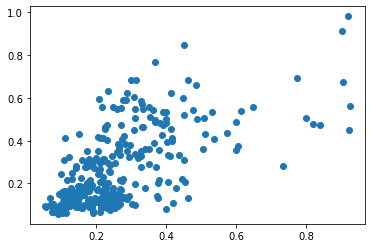

In [13]:

plt.scatter(jsonDF['Box_norm_width'], jsonDF['Box_norm_height'])

### Find the optimum number of cluster for the given data shape by plotting the kmeans inertia vs number of cluster
The plot is shaped like an elbow , the optimal number of cluster is at the elbow of the plot.

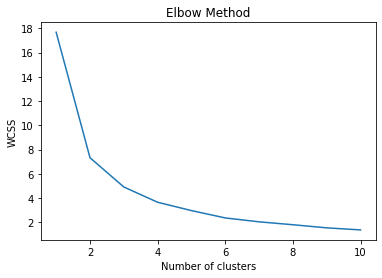

In [14]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(feedTOKMeans)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Plot the cluster center for 5 clusters
Data is concentrated close to the first cluster

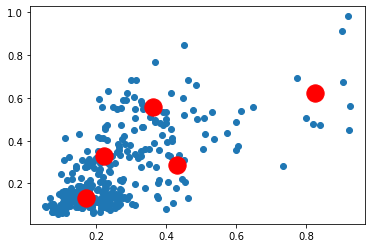

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(feedTOKMeans)

plt.scatter(feedTOKMeans[:,0], feedTOKMeans[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [16]:
kmx = kmeans.cluster_centers_[:, 0]
kmy = kmeans.cluster_centers_[:, 1]
kmx

array([0.22257609, 0.43082609, 0.16964643, 0.82386345, 0.36318298])

### Calculate the Intersection Over Union for each cluster w.r.t a given coordinate and chose the cluster which has maximum IoU

In [17]:

cluster = []
for i in range(len(jsonDF)):
    IoU = []
    for j in range(len(kmx)):
        minx = min(jsonDF['Box_norm_width'][i],kmx[j])
        miny = min(jsonDF['Box_norm_height'][i],kmy[j])
        maxx = max(jsonDF['Box_norm_width'][i],kmx[j])
        maxy = max(jsonDF['Box_norm_height'][i],kmy[j])
        
        IoU.append((min(jsonDF['Box_norm_width'][i],kmx[j])*min(jsonDF['Box_norm_height'][i],kmy[j]))/(max(jsonDF['Box_norm_width'][i],kmx[j])*max(jsonDF['Box_norm_height'][i],kmy[j])))
        #print(" bwid {} , kmx {} bhgt {} kmy {}".format(jsonDF['Box_norm_width'][i],kmx[j],jsonDF['Box_norm_height'][i],kmy[j]))
        #print("\n minx {} miny {} maxx {} maxy {} \n inter {} unin {} iou {}".format(minx , miny,maxx , maxy , min(jsonDF['Box_norm_width'][i],kmx[j])*min(jsonDF['Box_norm_height'][i],kmy[j]) ,(max(jsonDF['Box_norm_width'][i],kmx[j])*max(jsonDF['Box_norm_height'][i],kmy[j])) ))
    #print(" iou {} max{} indx {}".format(IoU , max(IoU) , IoU.index(max(IoU)) ))
    
    cluster.append(IoU.index(max(IoU)))
    
jsonDF["Cluster"] = cluster

### Store the cluster information in the dataframe

In [18]:
jsonDF["Cluster_centers"] = [kmeans.cluster_centers_ for i in range(len(jsonDF))]

### Show the final dataframe

In [19]:
jsonDF

,Img_name,Box_width,Box_height,Box_class,Image_width,Image_height,Box_norm_width,Box_norm_height,Box_X,Box_Y,Cluster,Cluster_centers
0,img_1.jpg,43,62,boot,246,205,0.174797,0.302439,3,4,0,"[[0.22257608896798747, 0.32658816748012065], [..."
1,img_1.jpg,49,64,boot,246,205,0.199187,0.312195,3,5,0,"[[0.22257608896798747, 0.32658816748012065], [..."
2,img_2.jpg,104,65,helmet,275,183,0.378182,0.355191,5,5,1,"[[0.22257608896798747, 0.32658816748012065], [..."
3,img_2.jpg,58,54,mask,275,183,0.210909,0.295082,3,4,0,"[[0.22257608896798747, 0.32658816748012065], [..."
4,img_3.jpg,47,38,helmet,271,186,0.173432,0.204301,3,3,2,"[[0.22257608896798747, 0.32658816748012065], [..."
...,...,...,...,...,...,...,...,...,...,...,...,...
303,img_50.jpg,140,93,boot,275,183,0.509091,0.508197,7,7,4,"[[0.22257608896798747, 0.32658816748012065], [..."
304,img_62.jpg,57,45,boot,259,194,0.220077,0.231959,3,4,0,"[[0.22257608896798747, 0.32658816748012065], [..."
305,img_62.jpg,48,56,vest,259,194,0.185328,0.288660,3,4,0,"[[0.22257608896798747, 0.32658816748012065], [..."
306,img_62.jpg,29,20,helmet,259,194,0.111969,0.103093,2,2,2,"[[0.22257608896798747, 0.32658816748012065], [..."


### Save the dataframe 

In [20]:
jsonDF.to_csv(filepath + 'S12_Assignment_Solution_cluster.csv', index= False)